In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv("covid19.csv")
df.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0


### Cleansing Data

In [4]:
df.isna().sum()

fever            0
bodyPain         0
age              0
runnyNose        0
diffBreath       0
infectionProb    0
dtype: int64

#### Persiapkan Data

In [6]:
X=df[["fever","bodyPain","age","runnyNose","diffBreath"]].to_numpy()
y=df["infectionProb"].to_numpy()

#### Splitting Data

In [9]:
## Splitting Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
model1 = svm.SVC()
model2 = LinearRegression()
model3 = KNeighborsClassifier()
model4 = GaussianNB()

mse1, bias1, var1 = bias_variance_decomp(model1, X_train, y_train, X_test, y_test, loss="mse", random_seed=100)
mse2, bias2, var2 = bias_variance_decomp(model2, X_train, y_train, X_test, y_test, loss="mse", random_seed=100)
mse3, bias3, var3 = bias_variance_decomp(model3, X_train, y_train, X_test, y_test, loss="mse", random_seed=100)
mse4, bias4, var4 = bias_variance_decomp(model4, X_train, y_train, X_test, y_test, loss="mse", random_seed=100)

print("MSE: %.3f" % mse1)
print("Bias: %.3f" % bias1)
print("Variance: %.3f" % var1)

print("===")

print("MSE: %.3f" % mse2)
print("Bias: %.3f" % bias2)
print("Variance: %.3f" % var2)

print("===")

print("MSE: %.3f" % mse3)
print("Bias: %.3f" % bias3)
print("Variance: %.3f" % var3)

print("===")

print("MSE: %.3f" % mse4)
print("Bias: %.3f" % bias4)
print("Variance: %.3f" % var4)

MSE: 0.491
Bias: 0.353
Variance: 0.138
===
MSE: 0.251
Bias: 0.250
Variance: 0.001
===
MSE: 0.480
Bias: 0.308
Variance: 0.172
===
MSE: 0.490
Bias: 0.341
Variance: 0.149


In [12]:
model2 = LinearRegression()
dataset = {
    "mse": [],
    "bias": [],
    "variance": []
}
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mse, bias, var = bias_variance_decomp(model2, X_train, y_train, X_test, y_test, loss="mse", random_seed=100)
    dataset['mse'].append(mse)
    dataset['bias'].append(bias) 
    dataset['variance'].append(var)
    
df = pd.DataFrame(dataset)
df

,mse,bias,variance
0,0.253004,0.252215,0.000789
1,0.250359,0.249545,0.000814
2,0.249745,0.248866,0.000879
3,0.250508,0.249699,0.000809
4,0.249903,0.249101,0.000802
5,0.251772,0.250866,0.000906
6,0.251264,0.250453,0.000811
7,0.251134,0.250254,0.000880
8,0.250544,0.249682,0.000862
9,0.252487,0.251646,0.000841


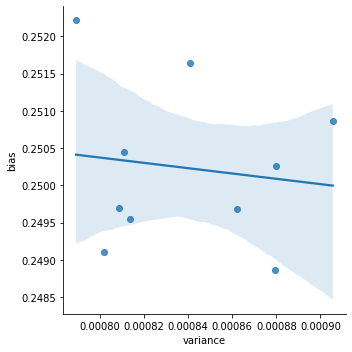

In [15]:
# Create lmplot
sns.lmplot(x='variance', y='bias', data=df)

# Show figure
plt.show()

### Cross Validation

In [18]:
score_cv = cross_val_score(KNeighborsClassifier(n_neighbors=6), X, y, cv=5)
print(score_cv)
print("Rata: ", score_cv.mean() * 100, "%")

[0.50291262 0.51456311 0.5184466  0.54174757 0.5184466 ]
Rata:  51.922330097087375 %


In [19]:
score_cv = cross_val_score(svm.SVC(kernel="linear"), X, y, cv=5)
print(score_cv)
print("Rata: ", score_cv.mean() * 100, "%")

[0.50679612 0.51456311 0.48932039 0.51262136 0.49902913]
Rata:  50.44660194174757 %


In [20]:
score_cv = cross_val_score(GaussianNB(), X, y, cv=5)
print(score_cv)
print("Rata: ", score_cv.mean() * 100, "%")

[0.47572816 0.5184466  0.50485437 0.50873786 0.50097087]
Rata:  50.1747572815534 %


<AxesSubplot:xlabel='n_neighbors'>

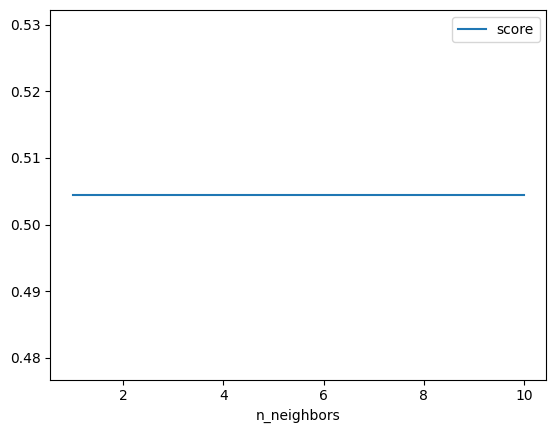

In [22]:
# Tuning Otomatis

dataset = {
    "score": [],
    "n_neighbors": []
}

for i in range(1, 11):
    score_cv = cross_val_score(svm.SVC(kernel="linear"), X, y, cv=5)
    dataset['n_neighbors'].append(i)    
    dataset['score'].append(score_cv.mean())

df = pd.DataFrame(dataset)

df.plot(x="n_neighbors", y="score")